In [100]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# print(city_df.head())
# print(ride_df.head())
# Combine the data into a single dataset
combined_data = city_df.merge(ride_df, how="inner", on="city")


# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [105]:

total_fare.head()

,fare
city,
Amandaburgh,443.55
Barajasview,557.31
Barronchester,582.76
Bethanyland,593.21
Bradshawfurt,400.64


## Bubble Plot of Ride Sharing Data

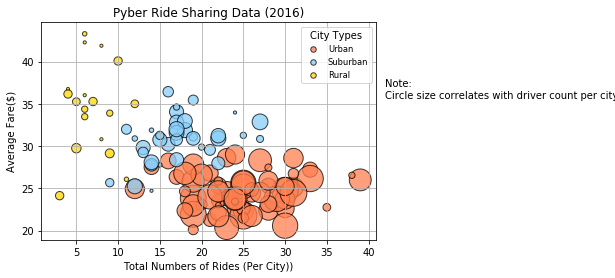

In [153]:
# Obtain the x and y coordinates for each of the three city types
avg_fare = combined_data[['city','fare']].groupby(['city']).mean()
total_fare = combined_data[['city','fare']].groupby(['city']).sum()
total_fare = total_fare.rename(columns={
    'fare': 'total_fare'
})
avg_fare.head()
total_fare
total_rides = combined_data[['city','ride_id']].groupby(['city']).count()
chart_df = city_df.merge(avg_fare, how="inner", on="city")
chart_df = chart_df.merge(total_rides, how="inner", on="city")
chart_df = chart_df.merge(total_fare, how="inner", on="city")
chart_df = chart_df.rename(columns={
    'ride_id':'ride_count',
    'fare': 'avg_fare'
})

urban = chart_df[scatter_df['type'] =='Urban']
rural = chart_df[scatter_df['type'] =='Rural']
burb = chart_df[scatter_df['type'] =='Suburban']

# Build the scatter plots for each city types
plt.scatter(urban['ride_count'], urban['avg_fare'],s=urban['driver_count']*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(burb['ride_count'], burb['avg_fare'],s=burb['driver_count']*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.75, label="Suburban")

plt.scatter(rural['ride_count'], rural['avg_fare'],s=rural['driver_count']*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.75, label="Rural")

# Incorporate the other graph properties

# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
lgnd = plt.legend(title='City Types',loc='upper right', fontsize='small', markerscale = .8)
lgnd.legendHandles[0]._sizes= [30]
lgnd.legendHandles[1]._sizes= [30]
lgnd.legendHandles[2]._sizes= [30]
plt.grid()

plt.annotate('Note:\nCircle size correlates with driver count per city.',
            xy=(385,180), xycoords='figure pixels')

# plt.figure(figsize=(100, 100), dpi=80)

# Save Figure
plt.savefig("../Images/Pyber Ride Sharing.png", bbox_inches="tight")

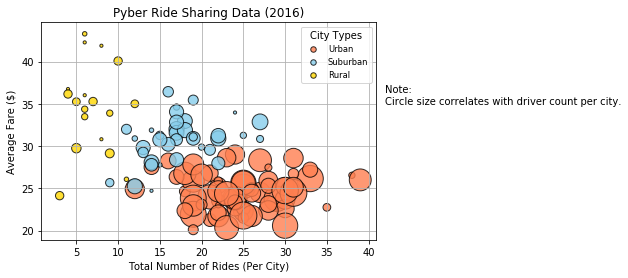

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

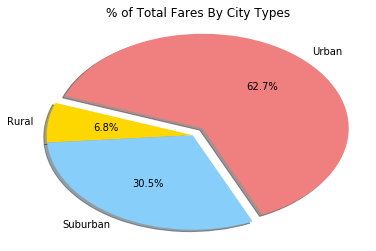

In [152]:
# Calculate Total Fare by City Type
total_fare = chart_df.groupby(['type'])['total_fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("tight")
plt.savefig("../Images/% of Total Fares By City Types.png")
plt.show()

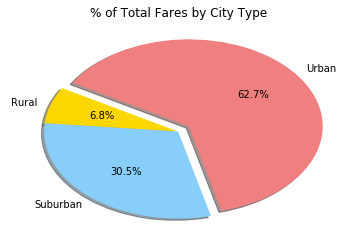

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

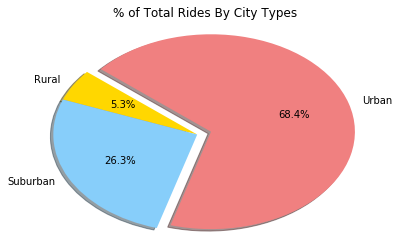

In [151]:

# Calculate Total Fare by City Type
total_rides = combined_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.savefig("../Images/% of Total Rides By City Types.png")
plt.show()

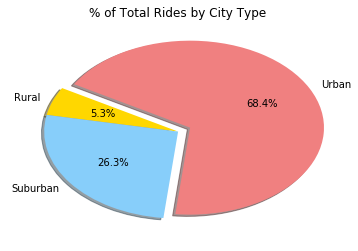

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

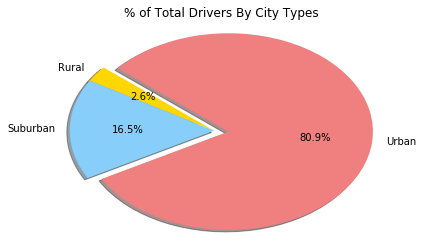

In [150]:
# Calculate Total Drivers by City Type
total_drivers = chart_df.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.savefig("../Images/% of Total Drivers By City Types.png")
plt.show()

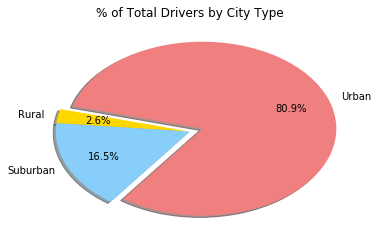

In [6]:
# Show Figure
plt.show()